In [70]:
# import pickle
import pandas as pd
import numpy as np

from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
dataset =pd.read_csv('income_evaluation.csv')

dataset = dataset.rename(columns=lambda x: x.strip().lower())


In [72]:
dataset

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [73]:
le = LabelEncoder() # Convert catregorical data to numeric using self assigned numeric values for each class. Also for numeric data
for i in dataset.columns:
    dataset[i] = le.fit_transform(dataset[i]) # Fits and Transforms all data columns to their corresponding encoded numeric values
    
  

In [74]:
dataset

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,22,7,2671,9,12,4,1,1,4,1,25,0,39,39,0
1,33,6,2926,9,12,2,4,0,4,1,0,0,12,39,0
2,21,4,14086,11,8,0,6,1,4,1,0,0,39,39,0
3,36,4,15336,1,6,2,6,0,2,1,0,0,39,39,0
4,11,4,19355,9,12,2,10,5,2,0,0,0,39,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,10,4,16528,7,11,2,13,5,4,0,0,0,37,39,0
32557,23,4,8080,11,8,2,7,0,4,1,0,0,39,39,1
32558,41,4,7883,11,8,6,1,4,4,0,0,0,39,39,0
32559,5,4,12881,11,8,4,1,3,4,1,0,0,19,39,0


In [75]:
dataset.corr()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
age,1.000000,0.003831,-0.078463,-0.010499,0.036548,-0.266429,-0.020930,-0.263783,0.028752,0.088863,0.125916,0.065058,0.069123,-0.001145,0.234134
workclass,0.003831,1.000000,-0.018443,0.023513,0.052085,-0.064731,0.254892,-0.090461,0.049742,0.095981,0.029347,0.015615,0.139541,-0.007690,0.051604
fnlwgt,-0.078463,-0.018443,1.000000,-0.027068,-0.042849,0.030125,0.003469,0.007016,-0.008979,0.025758,-0.004592,-0.009903,-0.019167,-0.057048,-0.010549
education,-0.010499,0.023513,-0.027068,1.000000,0.359153,-0.038407,-0.021260,-0.010876,0.014131,-0.027356,0.031383,0.016113,0.056295,0.064288,0.079317
education-num,0.036548,0.052085,-0.042849,0.359153,1.000000,-0.069304,0.109697,-0.094153,0.031838,0.012280,0.154410,0.084166,0.150094,0.050840,0.335154
marital-status,-0.266429,-0.064731,0.030125,-0.038407,-0.069304,1.000000,-0.009654,0.185451,-0.068013,-0.129314,-0.075138,-0.035240,-0.192645,-0.023819,-0.199307
occupation,-0.020930,0.254892,0.003469,-0.021260,0.109697,-0.009654,1.000000,-0.075607,0.006763,0.080296,0.026252,0.017342,0.080621,-0.012543,0.075468
relationship,-0.263783,-0.090461,0.007016,-0.010876,-0.094153,0.185451,-0.075607,1.000000,-0.116055,-0.582454,-0.093147,-0.064284,-0.251352,-0.005507,-0.250918
race,0.028752,0.049742,-0.008979,0.014131,0.031838,-0.068013,0.006763,-0.116055,1.000000,0.087204,0.024960,0.019363,0.042318,0.137852,0.071846
sex,0.088863,0.095981,0.025758,-0.027356,0.012280,-0.129314,0.080296,-0.582454,0.087204,1.000000,0.077589,0.049544,0.231355,-0.008119,0.215980


<AxesSubplot:>

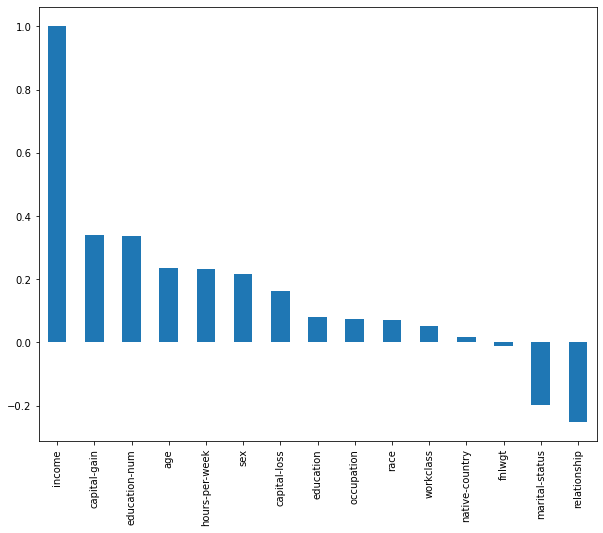

In [76]:
dataset.corrwith(dataset['income']).sort_values(ascending=False).plot(kind='bar',figsize=(10,8))

In [77]:
# """
# from the previous grapgh, we can drop "native-country" and "fnlwgt" since they are not showing much correlation
# with the target value "income"
# """
# dataset = dataset.drop(['native-country'], axis=1) 
# dataset = dataset.drop(['fnlwgt'], axis=1)

# # no we print the correlation graph again
# dataset.corrwith(dataset['income']).sort_values(ascending=False).plot(kind='bar',figsize=(10,8))


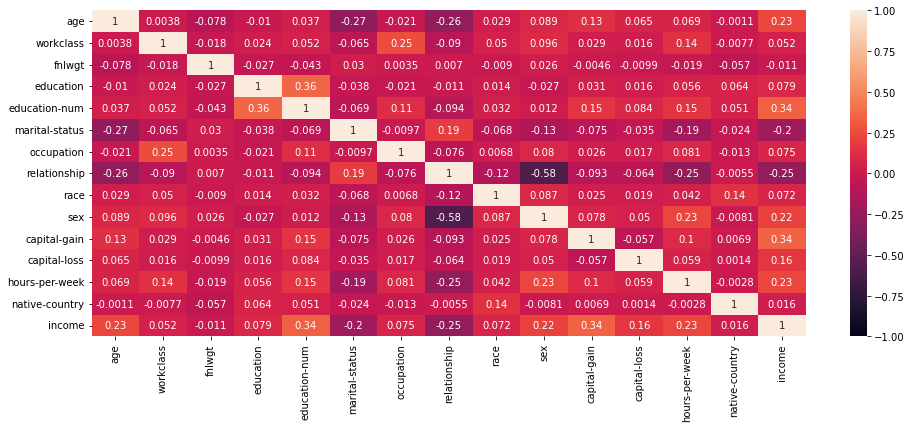

In [78]:
plt.figure(figsize=(16, 6))
ax = sns.heatmap(dataset.corr(), vmin=-1, vmax=1, annot=True)

In [79]:
X = dataset.drop(['income'], axis=1) # we want to predict income from the given samples so exclude income from features
y = dataset['income'] # Make income as your output y vector

In [80]:
y

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: income, Length: 32561, dtype: int64

In [81]:
# Now we divide the sample into train and test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,shuffle=True)

knnModel = KNeighborsClassifier(n_neighbors=3)

knnModel.fit(X_train, y_train)
y_predict = knnModel.predict(X_test)
y_predict_p = knnModel.predict_proba(X_test) # it calculates the probabilities of all the available outputs, (0,1) here

In [82]:
y_predict_p

array([[1.        , 0.        ],
       [1.        , 0.        ],
       [0.66666667, 0.33333333],
       ...,
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.33333333, 0.66666667]])

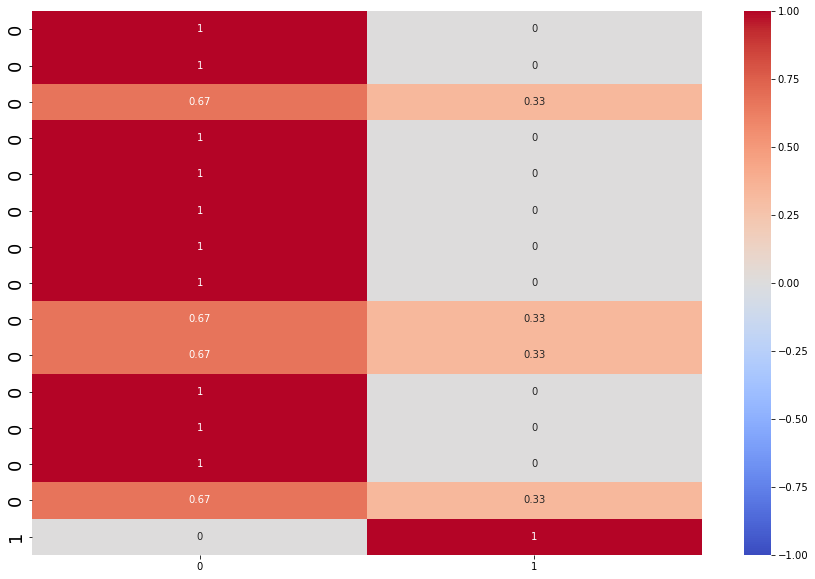

In [83]:
plt.figure(figsize=(15, 10))
ax = sns.heatmap(pd.DataFrame(y_predict_p)[:15], vmin=-1, vmax=1, annot=True,yticklabels=y_predict[:15],cmap='coolwarm')
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = 18)
plt.show()

In [84]:
dfg = pd.DataFrame(y_predict_p,columns='label1_p,label2_p'.split(','))
dfg['predicted_label']= y_predict
dfg['original_label']= list(y_test)
dfg.head(15)

,label1_p,label2_p,predicted_label,original_label
0,1.000000,0.000000,0,0
1,1.000000,0.000000,0,0
2,0.666667,0.333333,0,0
3,1.000000,0.000000,0,0
4,1.000000,0.000000,0,0
5,1.000000,0.000000,0,0
6,1.000000,0.000000,0,0
7,1.000000,0.000000,0,0
8,0.666667,0.333333,0,1
9,0.666667,0.333333,0,0


In [85]:
print(confusion_matrix(y_test,y_predict))
print()
print(classification_report(y_test,y_predict))

[[4357  635]
 [ 877  644]]

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      4992
           1       0.50      0.42      0.46      1521

    accuracy                           0.77      6513
   macro avg       0.67      0.65      0.66      6513
weighted avg       0.76      0.77      0.76      6513



In [86]:
from mlxtend.plotting import plot_decision_regions

In [87]:
X

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,22,7,2671,9,12,4,1,1,4,1,25,0,39,39
1,33,6,2926,9,12,2,4,0,4,1,0,0,12,39
2,21,4,14086,11,8,0,6,1,4,1,0,0,39,39
3,36,4,15336,1,6,2,6,0,2,1,0,0,39,39
4,11,4,19355,9,12,2,10,5,2,0,0,0,39,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,10,4,16528,7,11,2,13,5,4,0,0,0,37,39
32557,23,4,8080,11,8,2,7,0,4,1,0,0,39,39
32558,41,4,7883,11,8,6,1,4,4,0,0,0,39,39
32559,5,4,12881,11,8,4,1,3,4,1,0,0,19,39


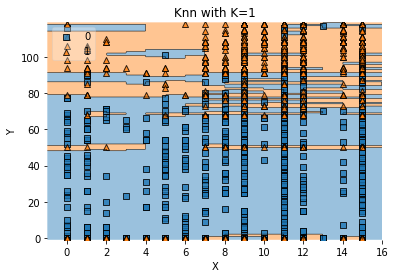

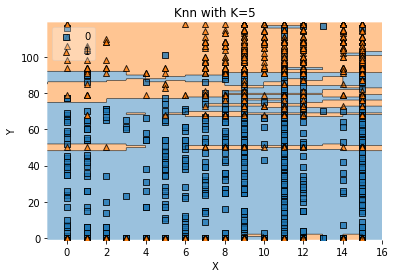

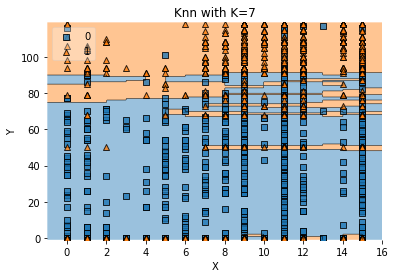

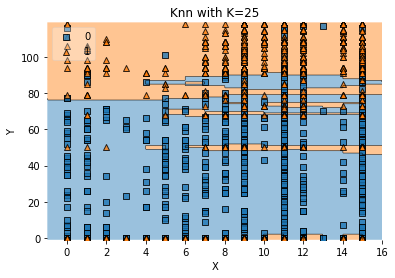

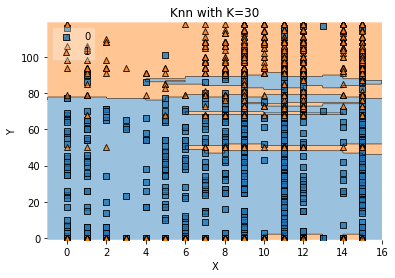

In [88]:
def knn_comparison(XX,yy, k):

    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(XX, yy)
    # Plotting decision region
    plot_decision_regions(XX, yy, clf=clf, legend=2)
    # Adding axes annotations

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Knn with K='+ str(k))
    plt.show()
    
    
    
for i in [1,5,7,25,30]:
    knn_comparison(X[['education','capital-gain']].values,y.values, i)    

In [89]:
error = []
acc= []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    acc.append(accuracy_score(y_test,pred_i))
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

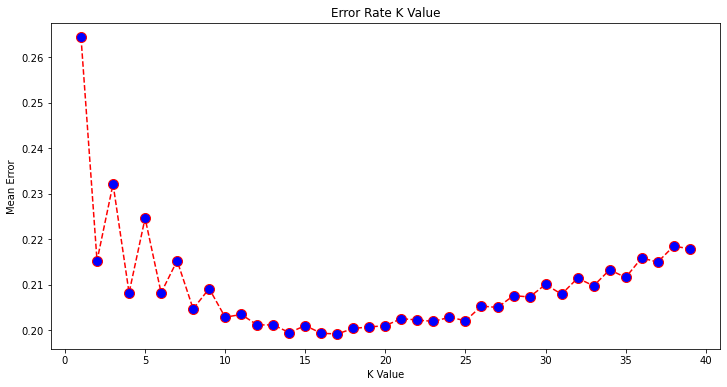

In [90]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

Text(0, 0.5, 'Accuracy')

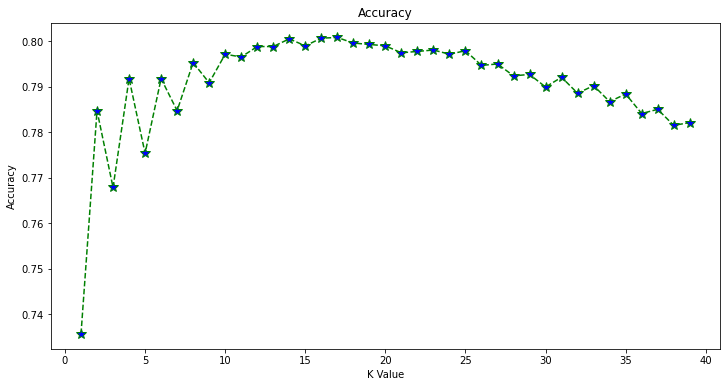

In [91]:
plt.figure(figsize=(12, 6))

plt.plot(range(1, 40), acc, color='green', linestyle='dashed', marker='*',
         markerfacecolor='blue', markersize=10)
plt.title('Accuracy')
plt.xlabel('K Value')
plt.ylabel('Accuracy')